# Изучение закономерностей, определяющих успешность игр

**Цель проекта: Необходимо выявить определяющие успешность игры закономерности. Благодаря этому мы сможем создать потенциально популярный продукт и спланировать рекламные кампании на будущий год. Для этого мы проанализируем данные о продажах ихр c 1980 г. по 2016 г.**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Откроем файл с данными и изучим общую информацию

In [5]:
data = pd.read_csv('D:/DA/projects/games.csv')

### Выведем первые 10 строк

In [6]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
data.sample()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10705,Universal Studios Theme Parks Adventure,GC,2001.0,Misc,0.08,0.02,0.0,0.0,39.0,2.9,T


**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Изучим датафрейм с помощью info

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Постороим гистограммы

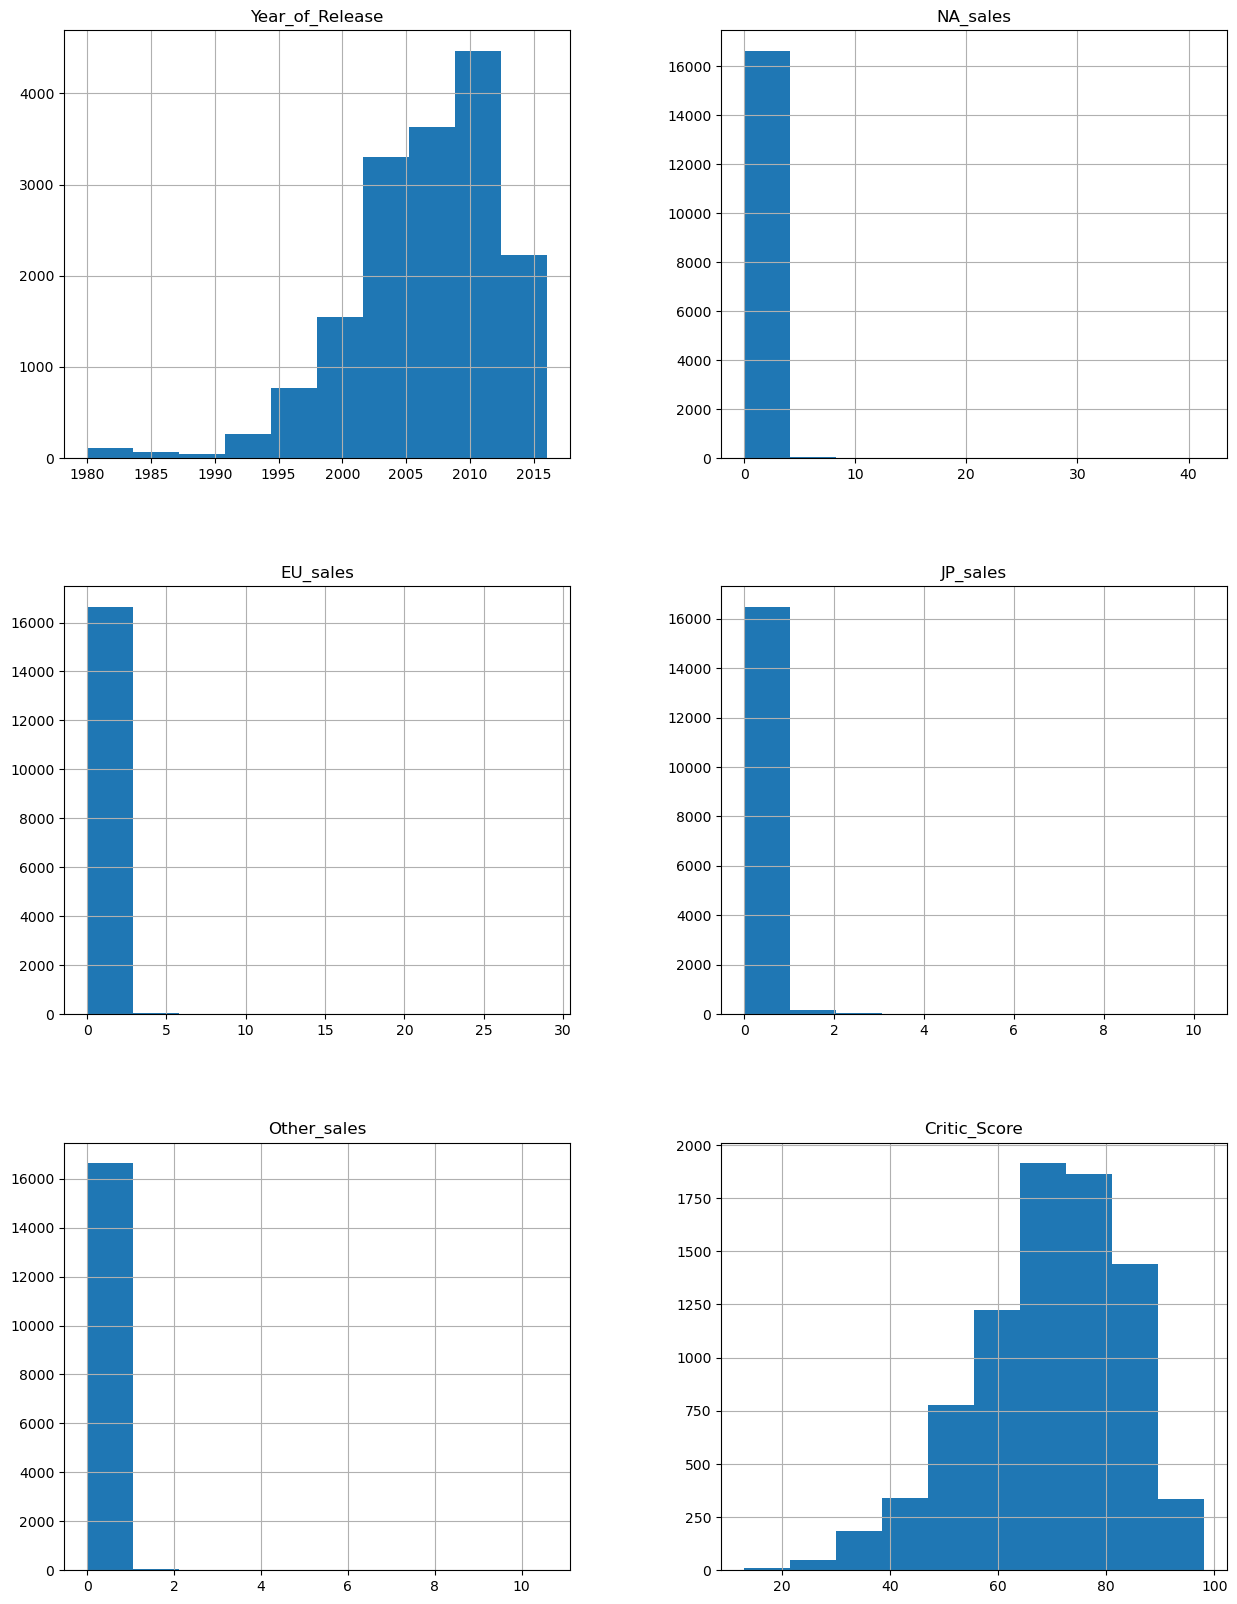

In [9]:
data.hist(figsize = (15, 20))
plt.show()

### Посмотрим на количество пропущенных значений

In [10]:
data.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
Platform,0.00%
NA_sales,0.00%
EU_sales,0.00%
JP_sales,0.00%
Other_sales,0.00%
Name,0.01%
Genre,0.01%
Year_of_Release,1.61%
User_Score,40.09%
Rating,40.48%


**Вывод**
- Названия столбцов не соответствуют хорошему тону, необходимо привести к нижнему регистру.
- Есть небольшое количество пропусков в Name, Platform, Year_of_Release, Genre.
- Большое количество пропусков в Critic_Score, User_Score, Rating.
- Year_of_Release тип данных float, а должен быть datetime.
- User_Score тип данных object, а должен быть float.

## Подготовим данные

### Приведем названия столбцов к нижнему регистру

In [11]:
data.columns = data.columns.str.lower()

Проверим

In [12]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработаем пропуски и преобразуем типы данных

#### Удалим пропущенные данные в year_of_release, так как пропущено менее 2% и это не повлияет на результаты исследования. И изменим тип данных с float на int

In [13]:
data = data.dropna(subset=['year_of_release'])

In [14]:
data['year_of_release'] = data['year_of_release'].astype('int32')

#### Работа с user_score

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Видим странную оценку 'tbd'. Если я правильно понимаю, это аббревиатура, которая озночает "Будет определено". То есть оценки еще не успели получить по тем или иным причинам. Заменим пропуски и tbd на заглушку. И изменим тип данных на float**

In [16]:
data['user_score'] = data['user_score'].replace('tbd', -1)

In [17]:
data['user_score'] = data['user_score'].fillna(-1).astype('float')

#### Также удалим пропуски в name и genre, так как таких значений очень мало.

In [18]:
data = data.dropna(subset=['name', 'genre'])

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [19]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN,31.38


In [21]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [22]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

- «E» («Everyone») — «Для всех» 
- «M» («Mature») — «Для взрослых»
- «T» («Teen») — «Подросткам»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «EC» («Early childhood») — «Для детей младшего возраста»
- «RP» («Rating Pending») — «Рейтинг ожидается»

**Рейтинг ESRB работает только в Северной Америке, а в Японии это CERO. То есть пропуск это не ошибка. Поэтому заполним эти пропуски словом "unknow"**

In [23]:
data['rating'] = data['rating'].fillna('unknow')

In [24]:
data['rating'].value_counts()

unknow    6676
E         3921
T         2905
M         1536
E10+      1393
EC           8
K-A          3
AO           1
RP           1
Name: rating, dtype: int64

- Пропуски в оценках пользователей, возможно, связано с тем, что пользователи не особо любят давать обратную связь и хотят просто поиграть, тем самым игнорируют вопрос оценки игры.
- Пропуски в critic_score действительно могут быть. Те или иные игры могли пройти мимо критиков.
- Пропуски в year_of_release возможны, ведь некоторые платформы вышли позже, чем сами игры.

## Проведем исследовательский анализ данных

### Посмотрим сколько игр выпускалось в разные годы

In [25]:
dt = data.pivot_table(index='year_of_release', values=['name'], aggfunc=['count'])

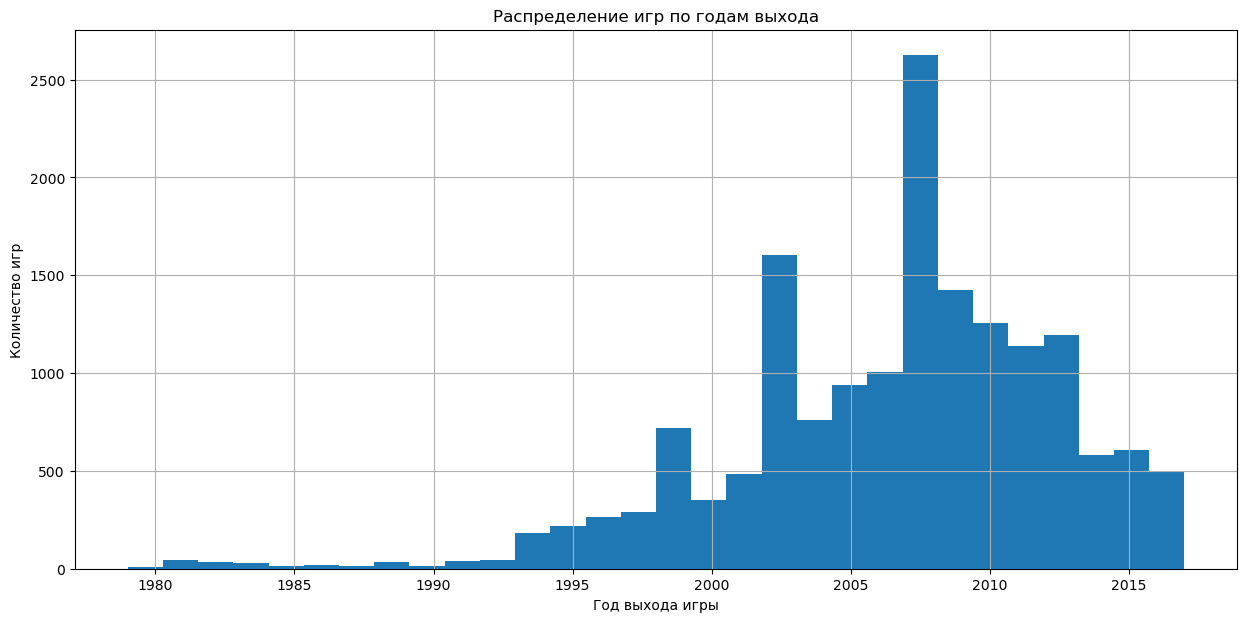

In [30]:
data['year_of_release'].hist(bins=30, figsize=(15, 7), range=(1979, 2017))
plt.title('Распределение игр по годам выхода')
plt.xlabel('Год выхода игры')
plt.ylabel('Количество игр');

**Я думаю данные до 2000 г. можно не учитывать из-за их малого количества. До 2000г. игровая индустрия выглядела довольно скудно по сравнению с "жирными" годами 2006-2011.**

### Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. Выяснем за какой характерный срок появляются новые и исчезают старые платформы?

In [31]:
data_sorted1 = data.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
data_sorted1.columns = ['sum']
data_sorted1 = data_sorted1.sort_values('sum', ascending = False).reset_index().head(10)
list_top = data_sorted1['platform'].tolist()
list_top

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

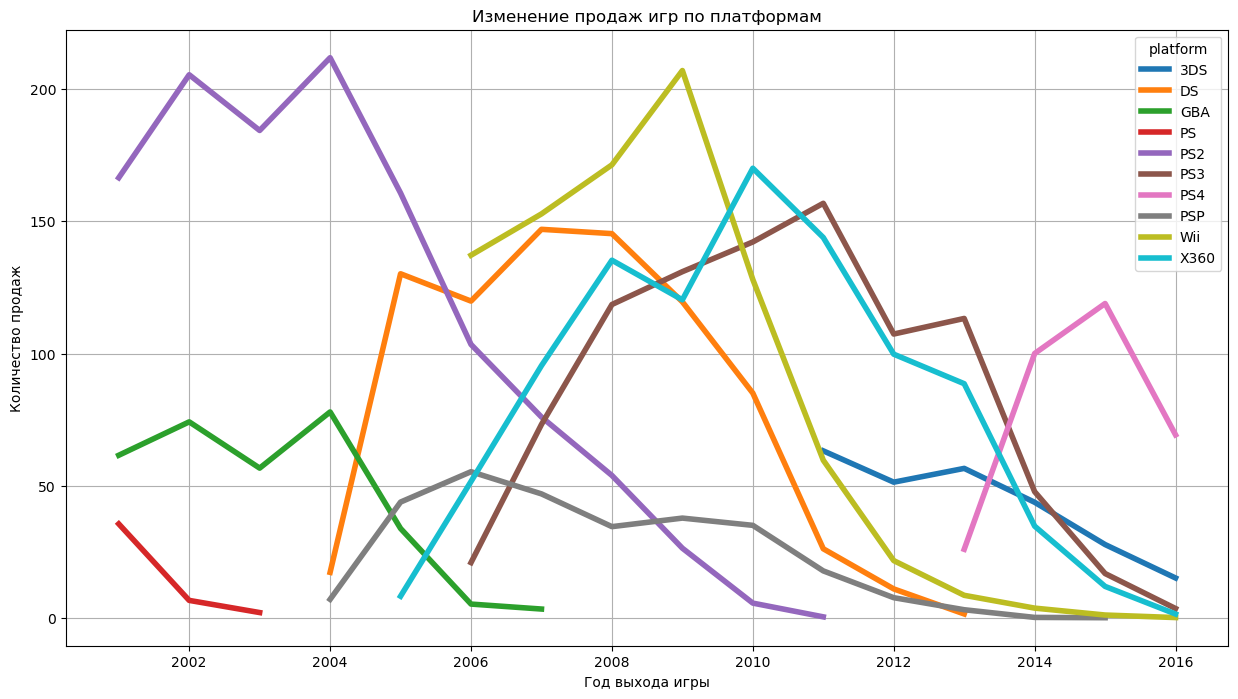

In [41]:
(
    data.query('platform == @list_top')
    .query('year_of_release > 2000')
    .pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc = 'sum')
    .plot(figsize = (15, 8), grid=True, linewidth=4)
)
plt.title('Изменение продаж игр по платформам')
plt.xlabel('Год выхода игры')
plt.ylabel('Количество продаж');

**Выяснили 10 самых прибыльных платформ. Это PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC. В среднем жизненный цикл платформы составляет 10 лет.**

### Возьмем данные за соответствующий актуальный период.

**Актуальным периодом будем считать 2014-2016 гг.**

In [42]:
data_actual = data.query('year_of_release > 2013')

### Не будем учитывайть в работе данные за предыдущие годы.

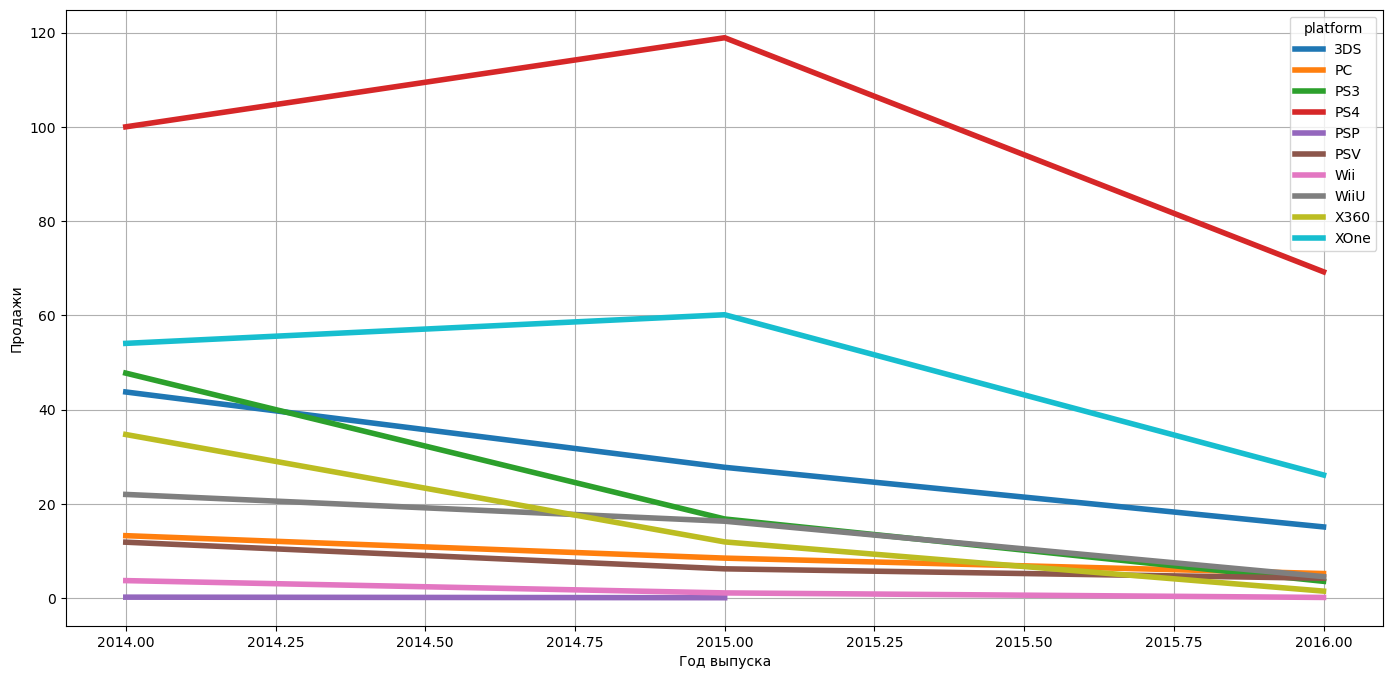

In [44]:
(
    data_actual
    .pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc = 'sum')
    .plot(figsize = (17,8), grid=True, linewidth=4)
)
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.title('')
plt.show()

### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

**Видим, что наиболее прибыльными являются платформы PS4 и XOne. Хотя, после 2015 г. видим, что продажи падают по всем платформам. Также перспективными можно считать платформы 3DS, PC, WiiU, PCV.**

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

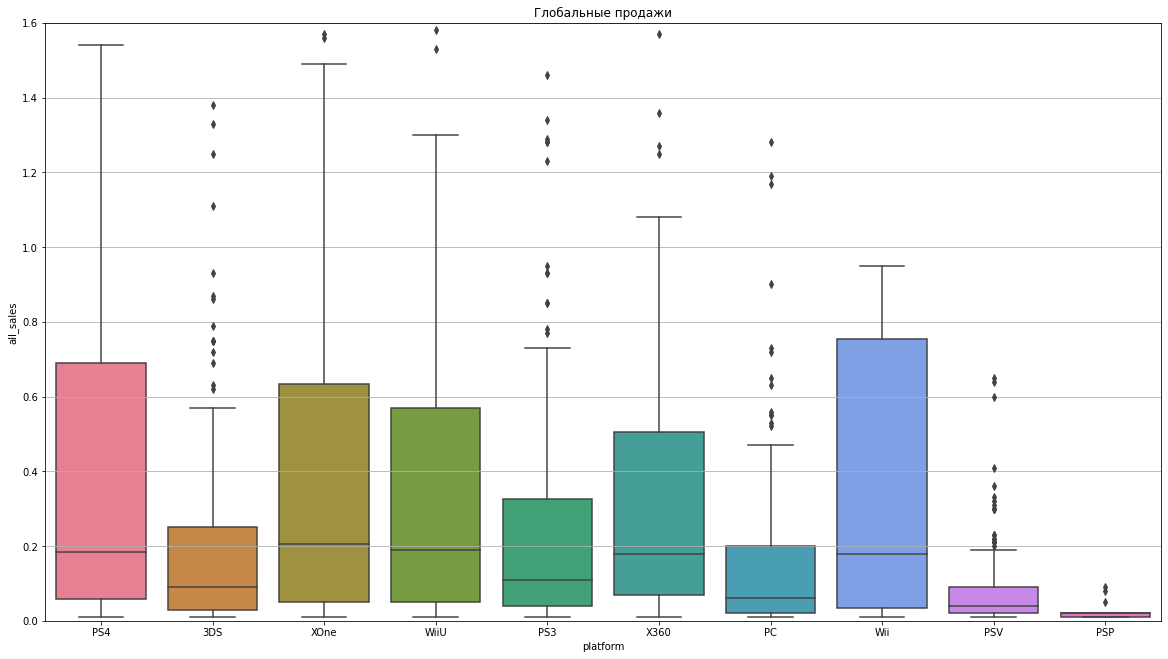

In [29]:
fig, ax = plt.subplots(figsize=(20, 11))
ax.grid()
sns.boxplot(data=data_actual, x='platform', y='all_sales', palette='husl')
plt.title('Глобальные продажи')
plt.ylim(0, 1.6)
plt.show()

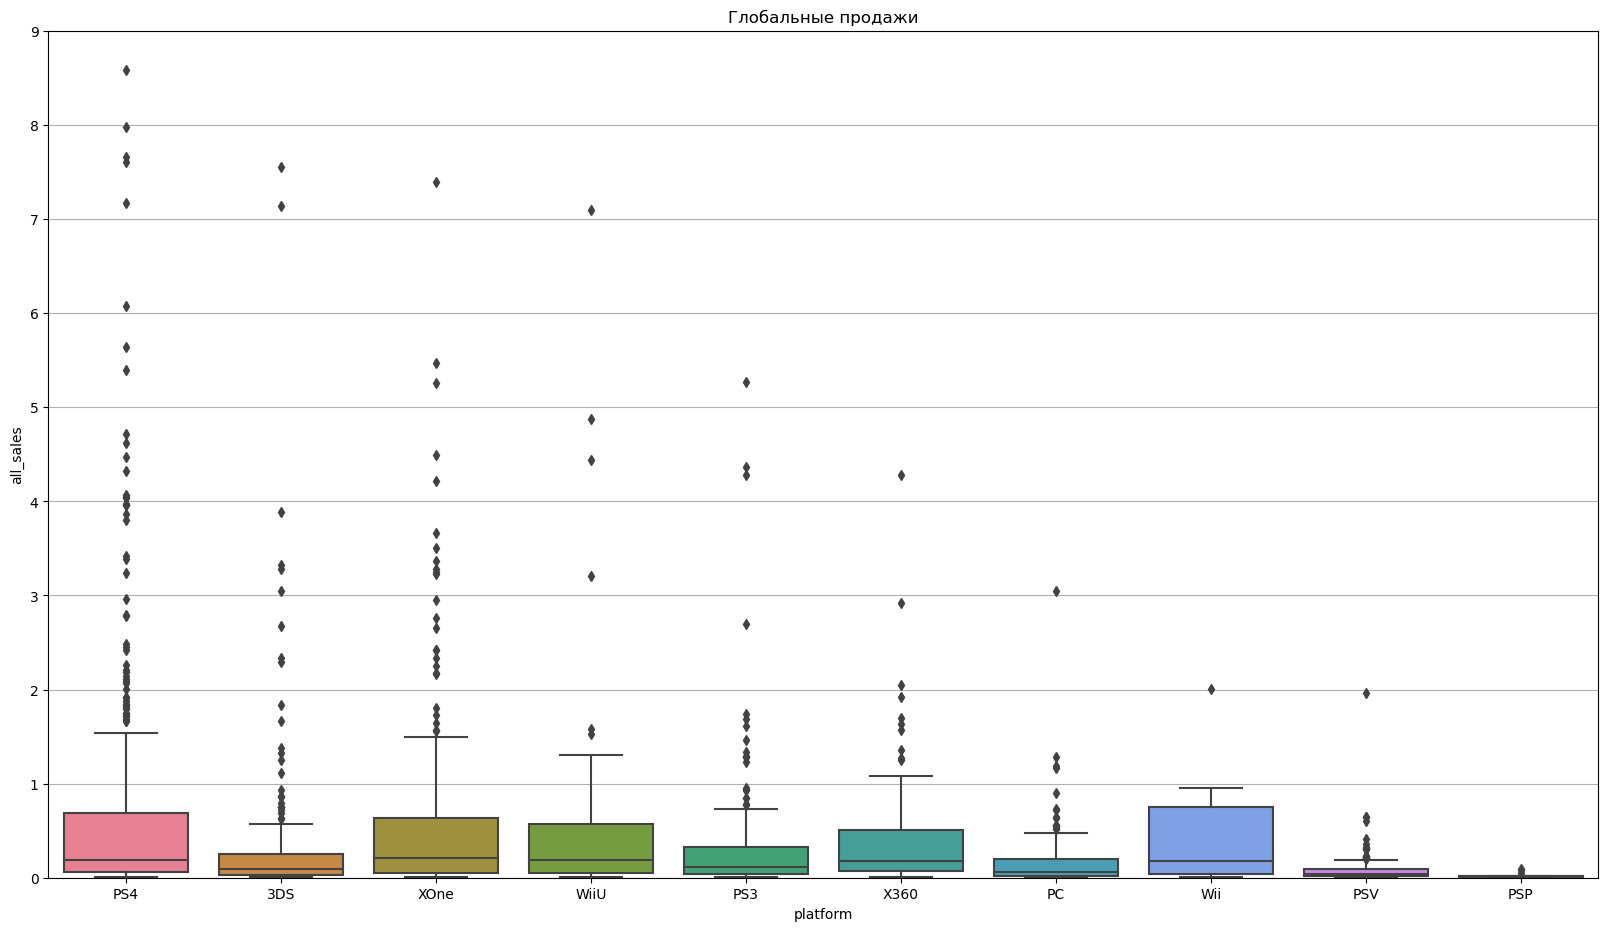

In [45]:
fig, ax = plt.subplots(figsize=(20, 11))
ax.grid()
sns.boxplot(data=data_actual, x='platform', y='all_sales', palette='husl')
plt.title('Глобальные продажи')
plt.ylim(0, 9)
plt.show()

**Видим, что самые большие "усы" у PS4 и XOne. Выбросов достаточно много и у PS4 и 3DS и у XOne. Медианы ближе к нижнему квартилю, это означает, что преобладают игры с небольшими продажами и небольшим числом популярных игр.**

### Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

In [46]:
data_actual = data_actual.query('user_score > -1')

In [47]:
data_actual[['user_score', 'critic_score', 'all_sales']].corr()

,user_score,critic_score,all_sales
user_score,1.00000,0.504460,-0.013070
critic_score,0.50446,1.000000,0.325363
all_sales,-0.01307,0.325363,1.000000


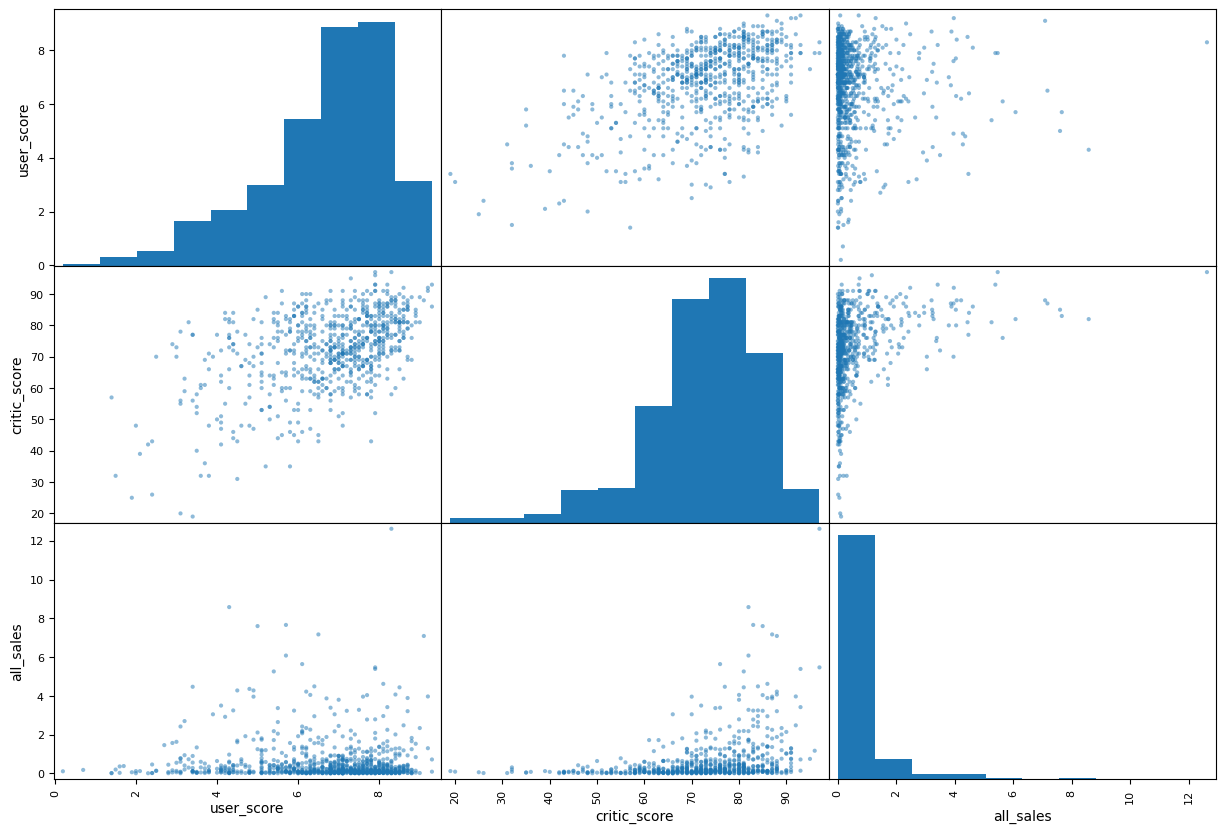

In [49]:
pd.plotting.scatter_matrix(data_actual[['user_score', 'critic_score', 'all_sales']], figsize=(15, 10)) 
plt.show()

**Видим, что продажи никак не связаны с отзывами и оценками.**

### Соотнесем выводы с продажами игр на других платформах.

In [50]:
data_sorted2 = data_actual.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
data_sorted2.columns = ['sum']
data_sorted2 = data_sorted2.sort_values('sum', ascending = False).reset_index().head(5)
top = data_sorted2['platform'].tolist()
top

['PS4', 'XOne', 'PS3', 'X360', 'WiiU']

In [51]:
def platform(x):
    data_x = data_actual.loc[(data_actual['platform'] == x)]
    data_x.plot(x='user_score', y='all_sales', kind='scatter', title=x,figsize=(12, 7))
    plt.show()
    print(data_x[['user_score', 'critic_score', 'all_sales']].corr())

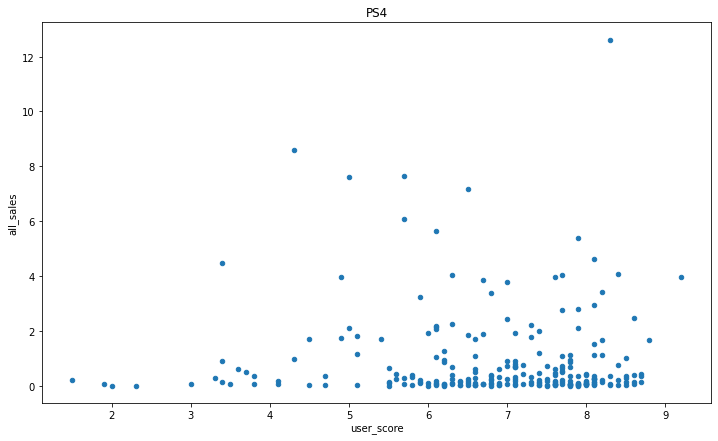

              user_score  critic_score  all_sales
user_score      1.000000      0.546434  -0.040132
critic_score    0.546434      1.000000   0.401903
all_sales      -0.040132      0.401903   1.000000


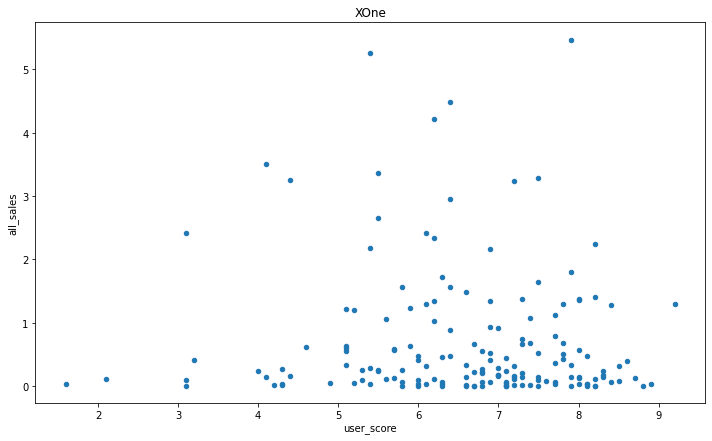

              user_score  critic_score  all_sales
user_score      1.000000      0.440977  -0.070384
critic_score    0.440977      1.000000   0.422112
all_sales      -0.070384      0.422112   1.000000


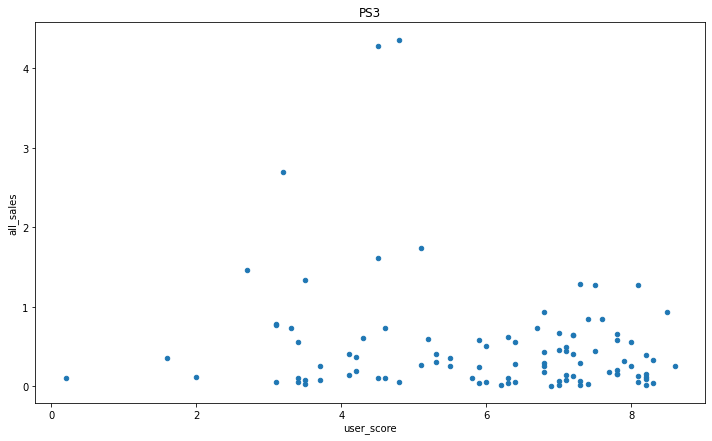

              user_score  critic_score  all_sales
user_score      1.000000      0.693445  -0.166761
critic_score    0.693445      1.000000   0.446575
all_sales      -0.166761      0.446575   1.000000


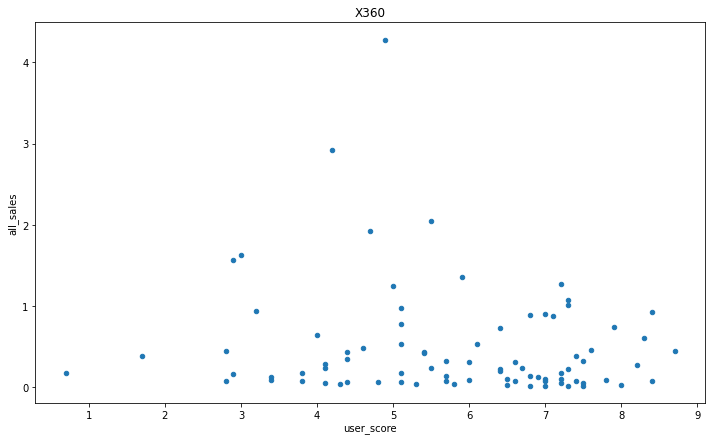

              user_score  critic_score  all_sales
user_score      1.000000      0.625309  -0.138445
critic_score    0.625309      1.000000   0.525723
all_sales      -0.138445      0.525723   1.000000


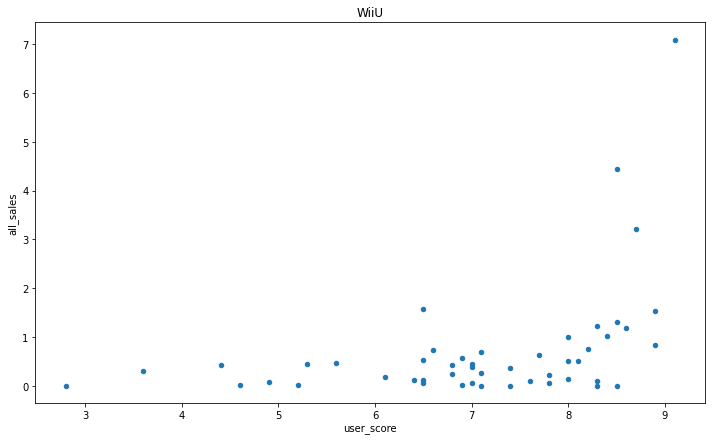

              user_score  critic_score  all_sales
user_score      1.000000      0.763536   0.407926
critic_score    0.763536      1.000000   0.375640
all_sales       0.407926      0.375640   1.000000


In [37]:
for x in top:
    platform(x)

Платформа PS4: 
- Корреляяция между продажами и отзывами пользователей низкая
- Корреляция между продажами и оценками критиков средняя

Платформа XOne:
- Корреляяция между продажами и отзывами пользователей низкая
- Корреляция между продажами и оценками критиков средняя

Платформа PS3:
- Корреляяция между продажами и отзывами пользователей низкая
- Корреляция между продажами и оценками критиков средняя

Платформа X360:
- Корреляяция между продажами и отзывами пользователей низкая
- Корреляция между продажами и оценками критиков средняя

Платформа WiiU:
- Корреляяция между продажами и отзывами пользователей средняя
- Корреляция между продажами и оценками критиков средняя

Судя по всему, при выборе игр пользователи больше доверяют оценкам критиков, чем отзывам пользователей.
Корреляция Пирсона может выявить только линенйную связь.


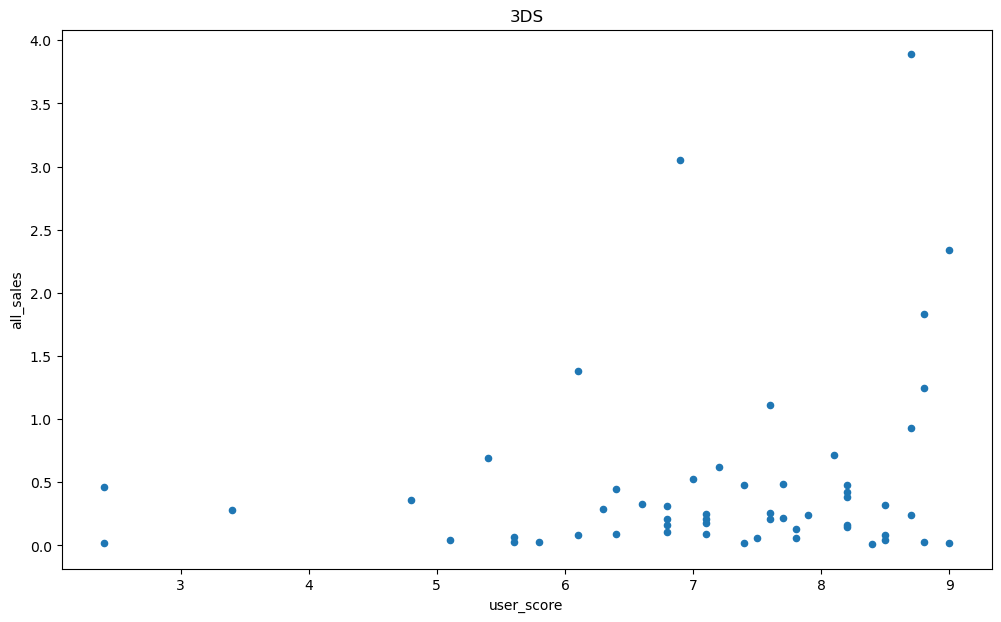

              user_score  critic_score  all_sales
user_score      1.000000      0.862485   0.215193
critic_score    0.862485      1.000000   0.284686
all_sales       0.215193      0.284686   1.000000


In [52]:
platform('3DS')

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

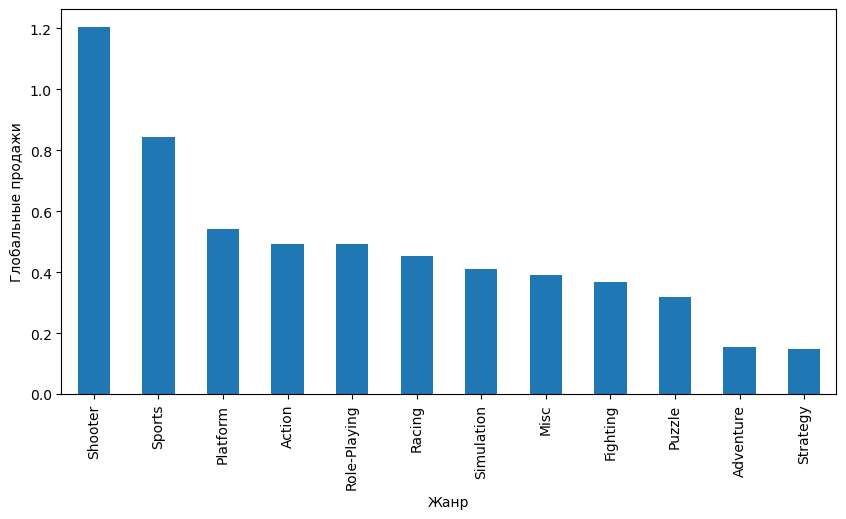

In [53]:
(data_actual
    .pivot_table(index='genre', values='all_sales')
    .sort_values('all_sales', ascending=False)
    .plot(kind='bar', y='all_sales', figsize=(10, 5), legend=False)
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

**Стрелялки и сопрт как всегда в топе.**

## Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP)

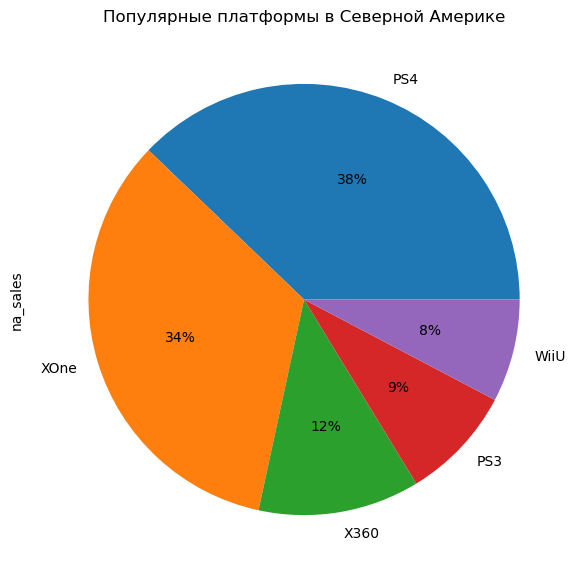

In [57]:
data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head(5).plot(kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(10, 7), legend=False, title = 'Популярные платформы в Северной Америке');

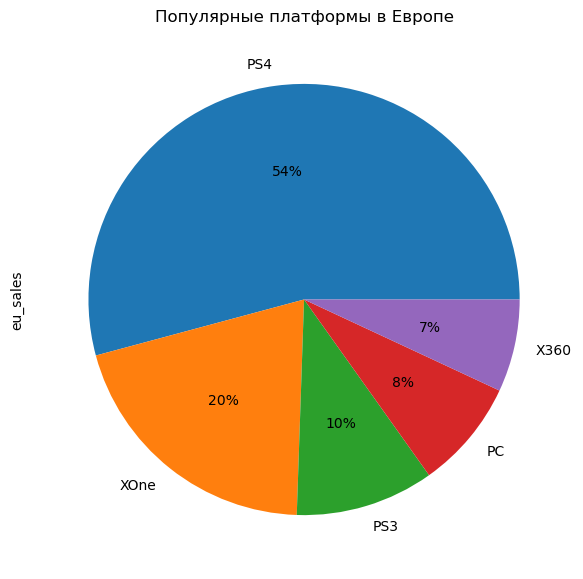

In [58]:
data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head(5).plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(10, 7), legend=False, title = 'Популярные платформы в Европе');

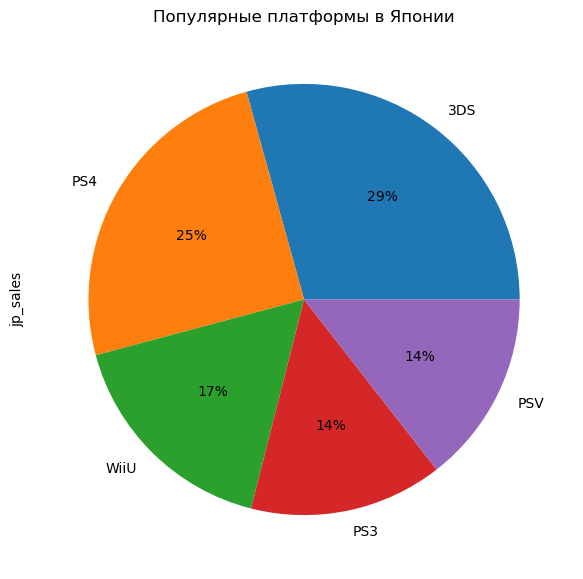

In [61]:
data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head(5).plot(kind='pie', y='jp_sales', autopct='%1.0f%%', figsize=(10, 7), legend=False, title = 'Популярные платформы в Японии');

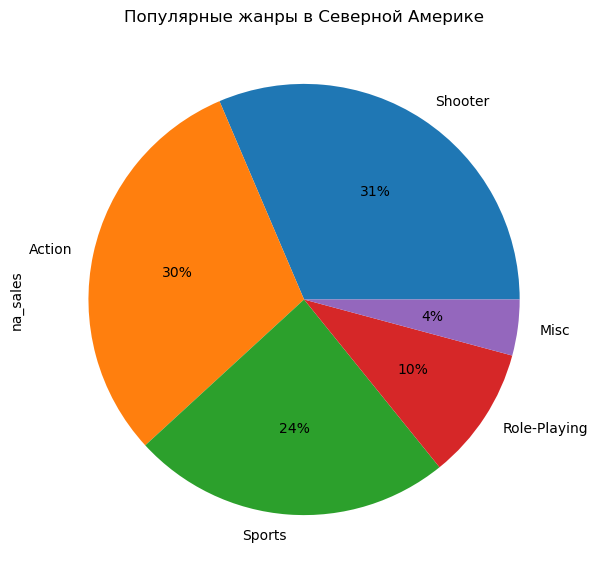

In [62]:
data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head(5).plot(kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(10, 7), legend=False, title = 'Популярные жанры в Северной Америке');


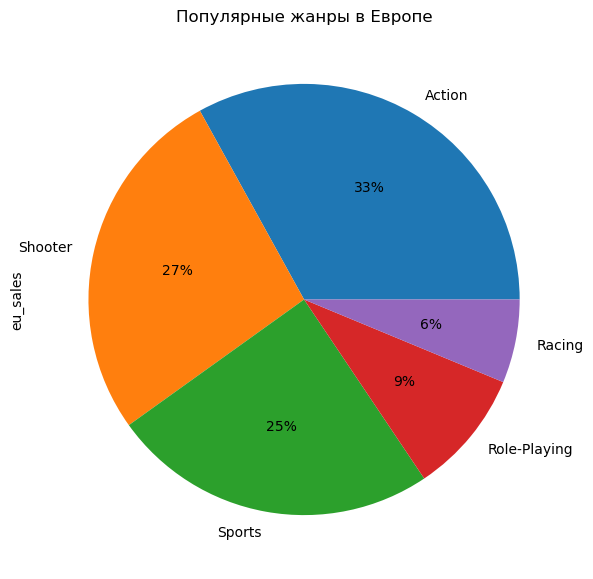

In [63]:
data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head(5).plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(10, 7), legend=False, title = 'Популярные жанры в Европе');


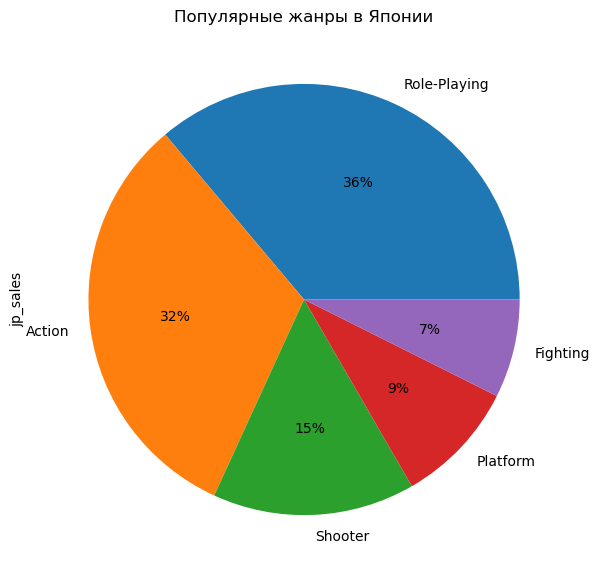

In [64]:
data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head(5).plot(kind='pie', y='jp_sales', autopct='%1.0f%%', figsize=(10, 7), legend=False, title = 'Популярные жанры в Японии');

**Видим, что Япония отличается от европейцов и северо-амереканцев. В Японии очень популярна платформа 3DS, в то время как в Северной Америке примерно одинаково популярны PS4 и XOne. А в Европе очень популяярна PS4. По жанровым предпочтениям Япония также отличается. В Японии помимо жанра экшен популярен жанр 'ролевые игры'. В Северной Америке и Европе популярны жанры экшен и стрелялки.**

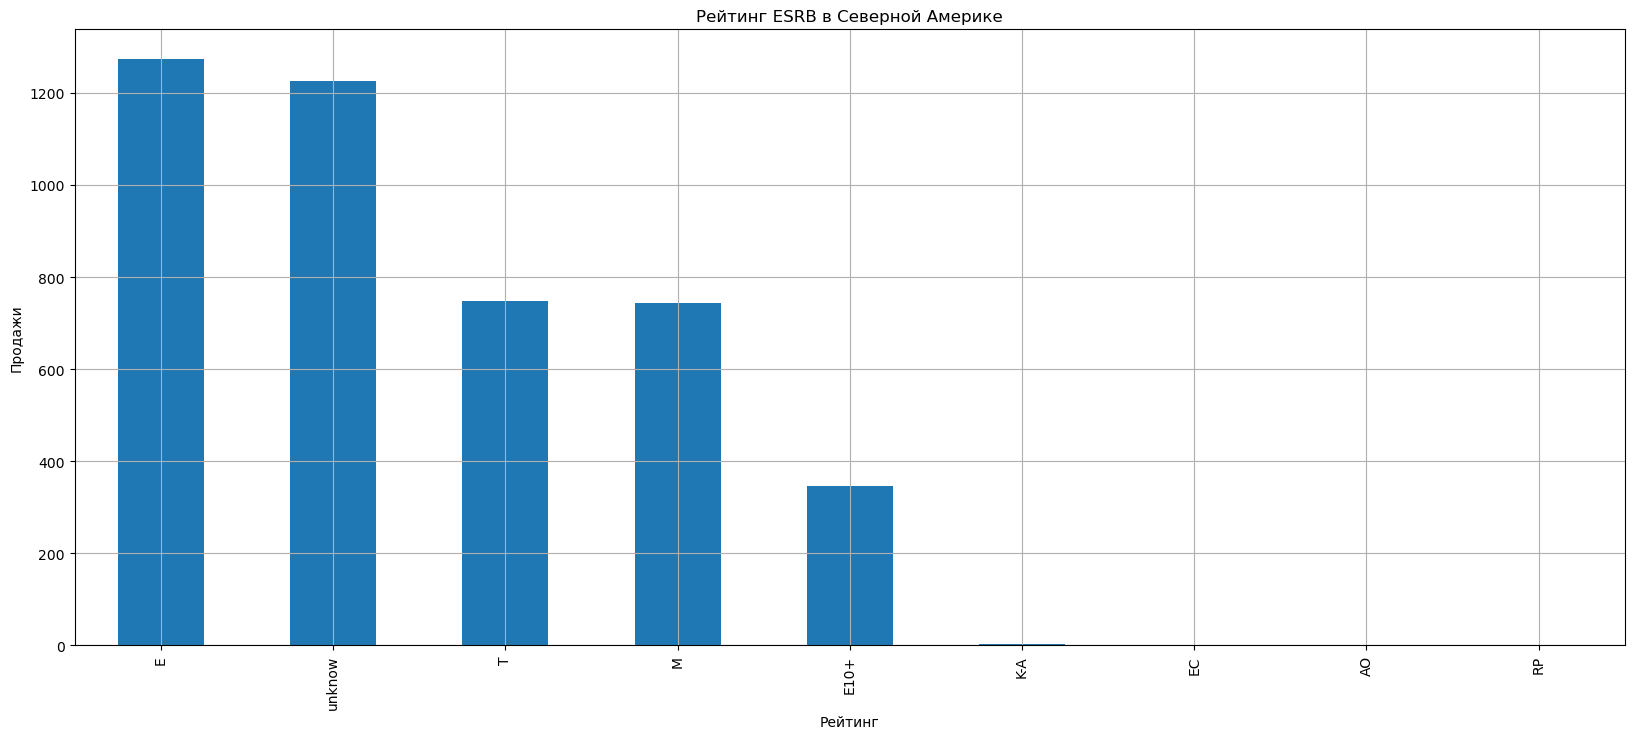

In [65]:
rating_region = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_region.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг ESRB в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

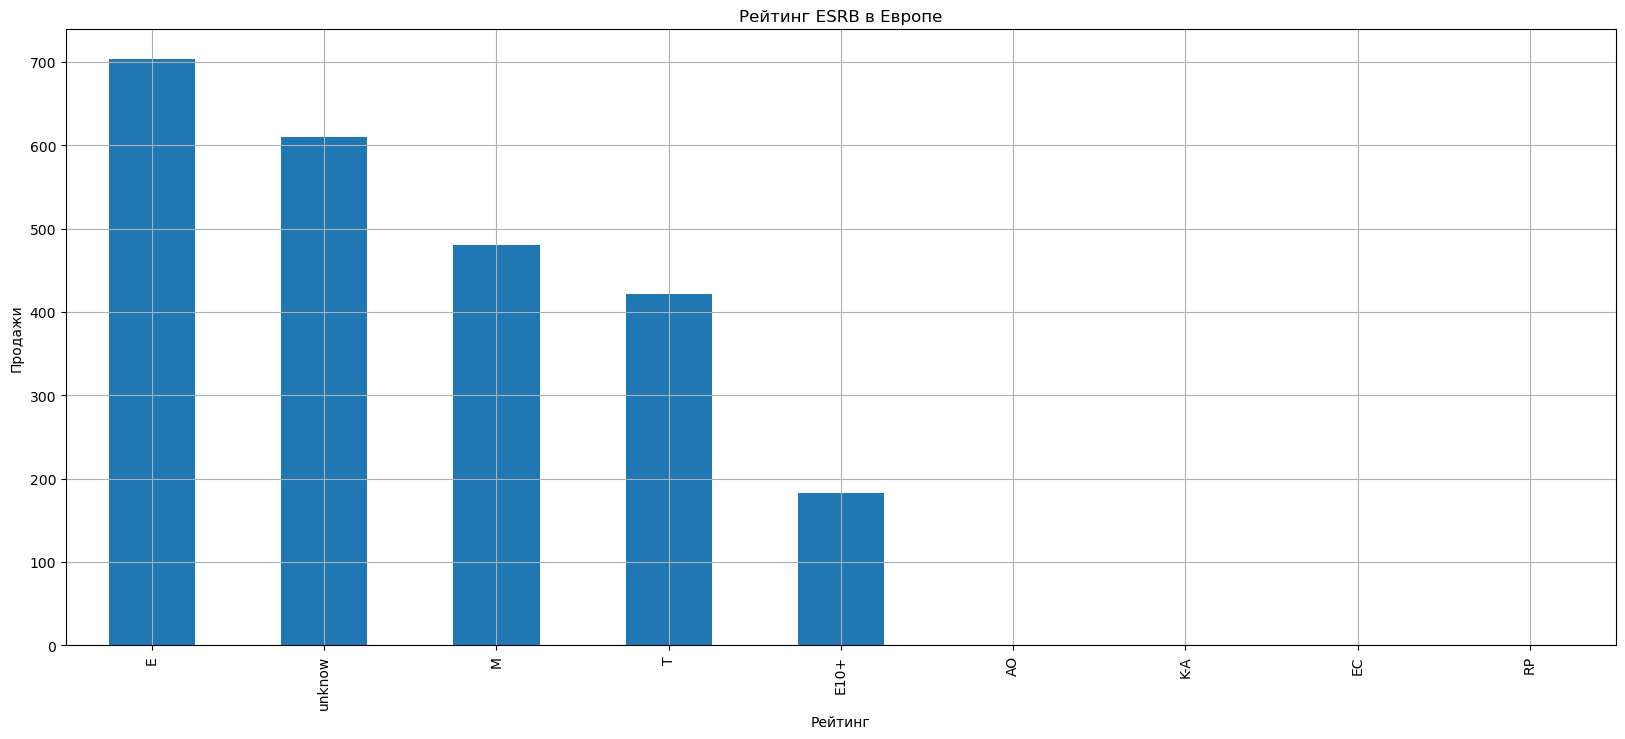

In [66]:
rating_region = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_region.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг ESRB в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

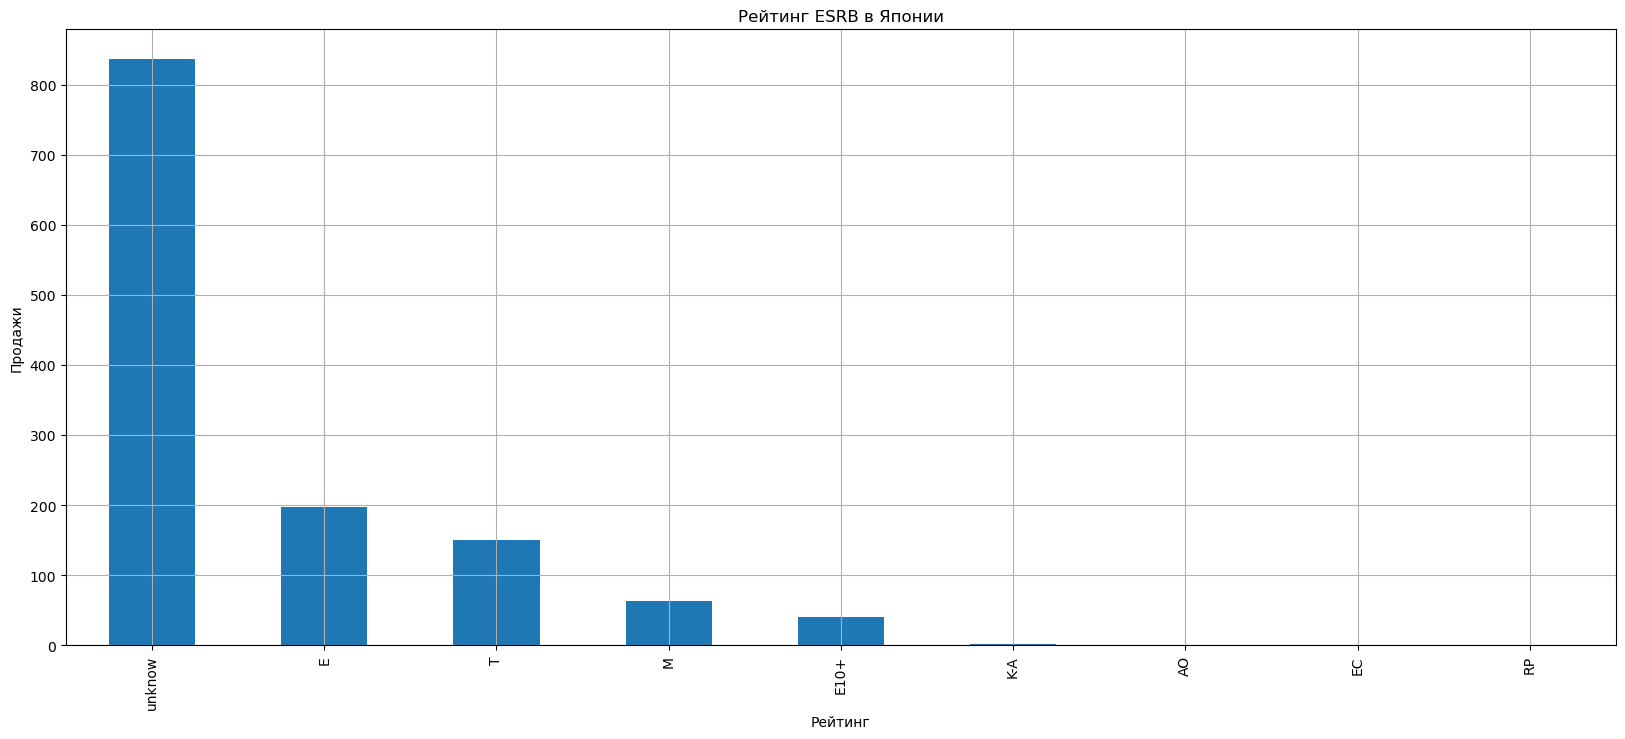

In [67]:
rating_region = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_region.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг ESRB в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

**Во всех регионах больше продаются игры в категории для всех. В Японии на втором месте по объему продаж игры в категории для подростков. В Северной Америке и Европе больши объем продаж имеют игры в категории для взрослых, нежели игры для подростков.**

## Проверим гипотезы

### Гипотеза1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [68]:
xone = data_actual.query('(platform == "XOne") & (user_score > -1)')
pc = data_actual.query('(platform == "PC") & (user_score > -1)')
alpha = .05
results = st.ttest_ind(xone['user_score'], pc['user_score'])
print (results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем гипотезу')
else:
    print('Не полуилось отвергнуть гипотезу')

0.10450507919348415
Не полуилось отвергнуть гипотезу


### Гипотеза2: Средние пользовательские рейтинги жанров Action и Sports разные.

In [69]:
action = data_actual.query('(genre == "Action") & (user_score > -1)')
sports = data_actual.query('(genre == "Sports") & (user_score > -1)')
alpha = .05
results = st.ttest_ind(action['user_score'], sports['user_score'])
print (results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем гипотезу')
else:
    print('Не полуилось отвергнуть гипотезу')

2.8711147985105864e-19
Отвергаем гипотезу


## Общий вывод

- Изучили общую информацию о данных. Выявили пропуски. Обнаружили не соответствие типов данных.
- Подготовили данные, заполнили пропуски, где могли.

Выполнили исследовательский анализ данных:
- После 2008 года наблюдается спад продажах.
- Выявили платформы с наибольшими продажами ('PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS')
- Платформы появляются и умирают в течение 10 лет.
- Определили, что для прогноза на 2017г. актуальным периодом будет 2014-2016гг.
- Наиболее популярные и перспективные на данный момент платформы – это PS4, XOne, 3DS, PC, WiiU, PCV.
- Преобладают игры с небольшими продажами и небольшим числом популярных игр.
- Корреляяция между продажами и отзывами пользователей низкая
- Корреляция между продажами и оценками критиков средняя
- Хорошо продаются игры в стиле "shooter" и "sport"
- В Северной Америке и Европе лучше всего продаются стрелялки и экшены.
- Японский рынок отличается и требует отдельного подхода. 
- Во всех регионах больше продаются игры в категории для всех. В Японии на втором месте по объему продаж игры в категории для подростков. В Северной Америке и Европе больши объем продаж имеют игры в категории для взрослых, нежели для подростков.